# English

In [2]:
import pandas as pd

df = pd.read_csv('yelp.csv')

In [3]:
df

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,VY_tvNUCCXGXQeSvJl757Q,2012-07-28,Ubyfp2RSDYW0g7Mbr8N3iA,3,First visit...Had lunch here today - used my G...,review,_eqQoPtQ3e3UxLE4faT6ow,1,2,0
9996,EKzMHI1tip8rC1-ZAy64yg,2012-01-18,2XyIOQKbVFb6uXQdJ0RzlQ,4,Should be called house of deliciousness!\n\nI ...,review,ROru4uk5SaYc3rg8IU7SQw,0,0,0
9997,53YGfwmbW73JhFiemNeyzQ,2010-11-16,jyznYkIbpqVmlsZxSDSypA,4,I recently visited Olive and Ivy for business ...,review,gGbN1aKQHMgfQZkqlsuwzg,0,0,0
9998,9SKdOoDHcFoxK5ZtsgHJoA,2012-12-02,5UKq9WQE1qQbJ0DJbc-B6Q,2,My nephew just moved to Scottsdale recently so...,review,0lyVoNazXa20WzUyZPLaQQ,0,0,0


In [4]:
df = df[['text', 'stars']]

In [5]:
df

,text,stars
0,My wife took me here on my birthday for breakf...,5
1,I have no idea why some people give bad review...,5
2,love the gyro plate. Rice is so good and I als...,4
3,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",5
4,General Manager Scott Petello is a good egg!!!...,5
...,...,...
9995,First visit...Had lunch here today - used my G...,3
9996,Should be called house of deliciousness!\n\nI ...,4
9997,I recently visited Olive and Ivy for business ...,4
9998,My nephew just moved to Scottsdale recently so...,2


<Axes: ylabel='Frequency'>

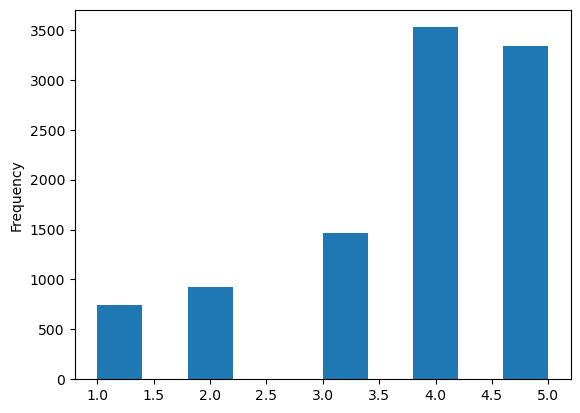

In [7]:
df['stars'].plot.hist()

In [9]:
# filter
df = df[df.stars != 3]

# re-labeling
def label(x) :
    if x > 3 :
        return 1
    else :
        return 0
df['class'] = df['stars'].apply(lambda x: label(x))

C:\Users\01wkd\AppData\Local\Temp\ipykernel_20752\1037827264.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['class'] = df['stars'].apply(lambda x: label(x))


In [10]:
df

,text,stars,class
0,My wife took me here on my birthday for breakf...,5,1
1,I have no idea why some people give bad review...,5,1
2,love the gyro plate. Rice is so good and I als...,4,1
3,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",5,1
4,General Manager Scott Petello is a good egg!!!...,5,1
...,...,...,...
9994,Let's see...what is there NOT to like about Su...,5,1
9996,Should be called house of deliciousness!\n\nI ...,4,1
9997,I recently visited Olive and Ivy for business ...,4,1
9998,My nephew just moved to Scottsdale recently so...,2,0


In [62]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [25]:
count_vect = TfidfVectorizer(max_features=1000,   # seledct top 1000 frequet tokens
                            ngram_range=(1, 3),   # use unigram and bigram
                            lowercase=True,       # lowercase input text
                            stop_words='english' ) #remove predefined stop words for English
X_counts = count_vect.fit_transform(df['text'])

In [26]:
X_counts

<8539x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 275676 stored elements in Compressed Sparse Row format>

In [27]:
X_counts.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [28]:
df_count = pd.DataFrame(X_counts.todense(), columns=count_vect.get_feature_names_out())

In [29]:
df_count

,00,10,100,11,12,15,20,25,30,40,...,wrong,yeah,year,years,yelp,yes,yogurt,young,yum,yummy
0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.113564,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8534,0.0,0.068843,0.0,0.000000,0.0,0.083419,0.0,0.095147,0.080826,0.0,...,0.0,0.0,0.156424,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
8535,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
8536,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.07494,0.0,0.0,0.0,0.0,0.0,0.0
8537,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
X = df_count
y = df['class']

In [42]:
# data split (train:test=7:3)
from sklearn.model_selection import train_test_split

X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, test_size = 0.3, stratify=y, random_state=42)


# model training
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(penalty='l1', C=10, solver ='saga', random_state=42)
clf.fit(X_trn, y_trn)

# model evaluation
from sklearn.metrics import accuracy_score, f1_score

y_trn_pred = clf.predict(X_trn)
acc = accuracy_score(y_trn, y_trn_pred)
f1 = f1_score(y_trn, y_trn_pred)
print('training acc={:.4f}, f1={:.4f}'.format(acc, f1))

y_tst_pred = clf.predict(X_tst)
acc = accuracy_score(y_tst, y_tst_pred)
f1 = f1_score(y_tst, y_tst_pred)
print('test acc={:.4f}, f1={:.4f}'.format(acc, f1))


training acc=0.9654, f1=0.9786
test acc=0.8833, f1=0.9281


C:\Users\01wkd\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [44]:
feature_names = df_count.columns
feature_coefs = clf.coef_.squeeze()

In [45]:
len(feature_coefs), len(feature_names)

(1000, 1000)

In [48]:
import numpy as np

args = np.argsort(feature_coefs)

In [50]:
print(feature_names[82], feature_coefs[82])
print(feature_names[385], feature_coefs[385])

bland -19.52134830329881
happy 17.00545360037263


In [51]:
# top 10 negative tokens
for i in args[:10]:
    print(feature_names[i], feature_coefs[i])

bland -19.52134830329881
horrible -15.64041447101449
overpriced -15.387995311785994
poor -14.349321103018553
slow -13.83822949280541
worst -13.051027332683438
rude -10.829783535414078
happy hour -10.444894534661737
frozen -10.395194297754172
pepper -9.75816820838226


In [53]:
# top 10 positive tokens
for i in args[-10:]:
    print(feature_names[i], feature_coefs[i])

excellent 13.147989585710706
yummy 13.770070074718424
vanilla 14.26958819799044
reasonably priced 14.330602728768108
amazing 15.352777871960699
great 15.52844619951151
perfect 15.59795605810283
awesome 15.756072144897548
fantastic 16.665966833293336
happy 17.00545360037263


In [55]:
for name, coef in zip(feature_names[-10:], feature_coefs[-10:]):
    print(name, coef)

wrong -3.1151729846180163
yeah -0.9998642771074053
year 0.11939604721712341
years 1.0331443120896768
yelp 4.988887562301062
yes 2.191170699683718
yogurt 0.0
young 0.46898060901840327
yum 9.05485359728721
yummy 13.770070074718424


# Korean

In [56]:
from konlpy.tag import Okt

def okt_tokenizer(text, return_nouns_only=True):
    """ 
    input: korean text
    output: tokens
    
    if return_nouns_only option is True, only nouns will be extracted.
    """
    okt = Okt()
    
    if return_nouns_only:
        tokens = okt.nouns(text)
    else:
        tokens = okt.morphs(text)
    
    # you can refer to the site below that lists Korean stopwords
    # https://www.ranks.nl/stopwords/korean
    stopwords = ['입니다', '은', '는', '이', '가', '이거', '저거', '그거', '여기', '이쪽', ]
    tokens = [n for n in tokens if n not in stopwords]
    return tokens

In [57]:
corpus = [
    '아 더빙.. 진짜 짜증나네요 목소리',
    '흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나',
    '너무재밓었다그래서보는것을추천한다',
    '교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정',
    '사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다',
    '막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.',
    '원작의 긴장감을 제대로 살려내지못했다.',
    '별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단 낫겟다 납치.감금만반복반복..이드라마는 가족도없다 연기못하는사람만모엿네',
    '액션이 없는데도 재미 있는 몇안되는 영화']

In [65]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(tokenizer=okt_tokenizer,
                             ngram_range=(1, 2),
                            max_features=20)




X = vectorizer.fit_transform(corpus)

df_X = pd.DataFrame(X.todense(), columns=vectorizer.get_feature_names_out())
df_X

C:\Users\01wkd\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


,가족,반개,반복,연기,연기 사람,연기 영화,영화,영화 반개,영화 줄,오버,오버 연기,욕,욕 이응경,움,원작,원작 긴장감,의,의 연기,이야기,재미
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0
5,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
7,1,1,2,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
8,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


# Word Cloud

In [68]:
df.text.values

array(['My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.\n\nDo yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I\'ve ever had.  I\'m pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.\n\nWhile EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I\'ve ever had.\n\nAnyway, I can\'t wait to go back!',
       'I have no idea why some people give bad reviews about this place. It goes to show 

In [70]:
len(' '.join(df.text.values))

6007759

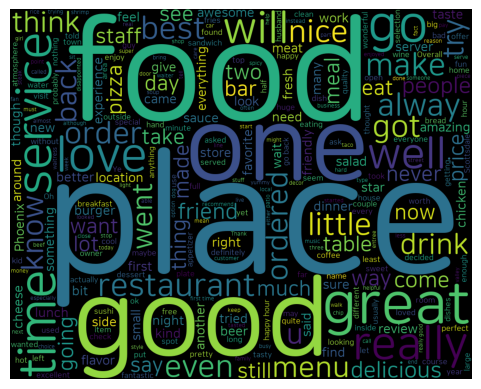

In [72]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = ' '.join(df.text.values) # all text documents in one string
wc = WordCloud(font_path='NanumSquareRoundR.ttf',
               width=1000,
               height=800,
               max_words=300).generate(text)
plt.imshow(wc)
plt.axis("off")
plt.show()

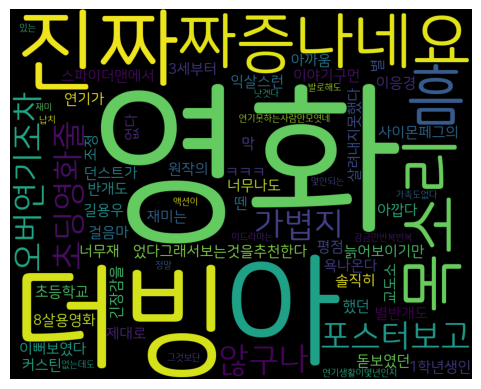

In [73]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = ' '.join(corpus) # all text documents in one string
wc = WordCloud(font_path='NanumSquareRoundR.ttf',
               width=1000,
               height=800,
               max_words=300).generate(text)
plt.imshow(wc)
plt.axis("off")
plt.show()